In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import useful libraries

In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications import VGG19
from keras.applications.vgg16 import VGG16

In [ ]:
#Get the datasets from the google drive

In [3]:
base_dir = 'drive/MyDrive/DL_Project_Datasets'

In [17]:
IMAGE_SIZE=224
BATCH_SIZE=32

In [18]:
#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.3
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 1513 images belonging to 8 classes.
Found 499 images belonging to 8 classes.


In [ ]:
cnn=tf.keras.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(8,activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)        

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist = cnn.fit(train_datagen,epochs=10,validation_data=test_datagen)

Epoch 1/10
14/48 [=======>......................] - ETA: 6:34 - loss: 2.0554 - accuracy: 0.2121

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


48/48 [==============================] - 656s 13s/step - loss: 2.0066 - accuracy: 0.2681 - val_loss: 1.9679 - val_accuracy: 0.2928
Epoch 2/10
48/48 [==============================] - 45s 952ms/step - loss: 1.9137 - accuracy: 0.2917 - val_loss: 1.8526 - val_accuracy: 0.3147
Epoch 3/10
48/48 [==============================] - 46s 976ms/step - loss: 1.7215 - accuracy: 0.3745 - val_loss: 1.6125 - val_accuracy: 0.4402
Epoch 4/10
48/48 [==============================] - 52s 1s/step - loss: 1.6172 - accuracy: 0.4304 - val_loss: 1.5122 - val_accuracy: 0.4661
Epoch 5/10
48/48 [==============================] - 46s 978ms/step - loss: 1.5255 - accuracy: 0.4573 - val_loss: 1.5163 - val_accuracy: 0.4562
Epoch 6/10
48/48 [==============================] - 46s 958ms/step - loss: 1.4937 - accuracy: 0.4514 - val_loss: 1.4065 - val_accuracy: 0.4980
Epoch 7/10
48/48 [==============================] - 46s 971ms/step - loss: 1.4275 - accuracy: 0.4908 - val_loss: 1.3714 - val_accuracy: 0.5239
Epoch 8/10
48/

In [ ]:
cnn.save("cnn.h5")

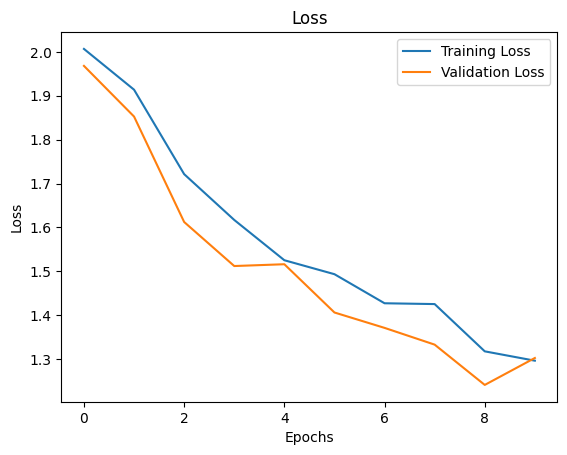

In [ ]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

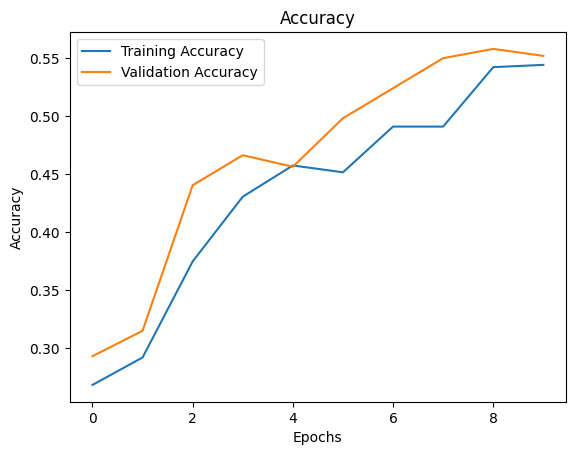

In [ ]:
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")
base_model.trainable = True

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
mob_model = tf.keras.Sequential([base_model,
                                   tf.keras.layers.BatchNormalization(axis=-1),
                                   tf.keras.layers.GlobalAveragePooling2D(),
                                   tf.keras.layers.Dropout(0.2),
                                   tf.keras.layers.Dense(512, activation='relu'),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.Dropout(rate=0.2),
                                   tf.keras.layers.Dense(8, activation='softmax')
                                ])
mob_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 1280)       5120      
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               655872    
                                                      

In [ ]:
mob_model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:

mob_history = mob_model.fit(train_datagen,
                          steps_per_epoch=len(train_datagen),
                          epochs=10,
                          validation_data=test_datagen,
                          validation_steps=len(test_datagen))

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10
48/48 [==============================] - 87s 1s/step - loss: 1.2512 - accuracy: 0.6748 - val_loss: 12.9289 - val_accuracy: 0.1972
Epoch 2/10
48/48 [==============================] - 55s 1s/step - loss: 0.7066 - accuracy: 0.7832 - val_loss: 16.0536 - val_accuracy: 0.1175
Epoch 3/10
48/48 [==============================] - 55s 1s/step - loss: 0.4668 - accuracy: 0.8515 - val_loss: 7.9057 - val_accuracy: 0.3367
Epoch 4/10
48/48 [==============================] - 55s 1s/step - loss: 0.3567 - accuracy: 0.8909 - val_loss: 10.7653 - val_accuracy: 0.2470
Epoch 5/10
48/48 [==============================] - 49s 1s/step - loss: 0.2953 - accuracy: 0.8962 - val_loss: 21.0802 - val_accuracy: 0.1892
Epoch 6/10
48/48 [==============================] - 50s 1s/step - loss: 0.3007 - accuracy: 0.9074 - val_loss: 5.2931 - val_accuracy: 0.4960
Epoch 7/10
48/48 [==============================] - 56s 1s/step - loss: 0.2743 - accuracy: 0.9106 - val_loss: 9.7691 - val_accuracy: 0.3904
Epoch 8/10
48/48

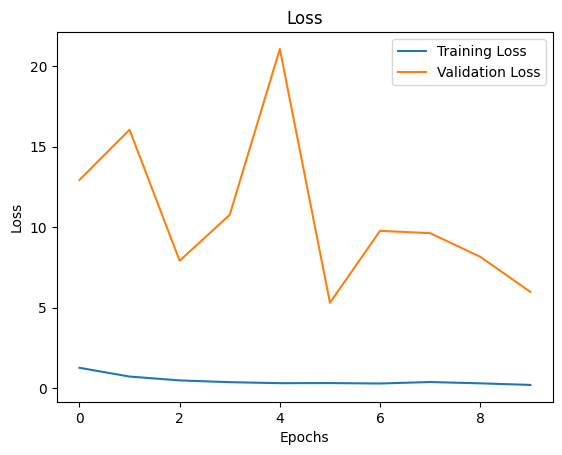

In [ ]:
plt.plot(mob_history.history['loss'], label='Training Loss')
plt.plot(mob_history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

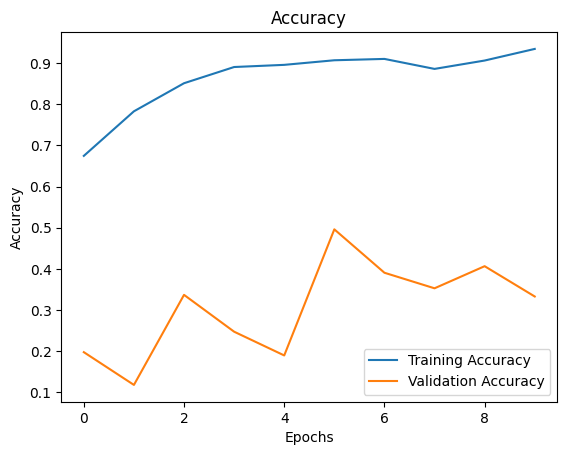

In [ ]:
plt.plot(mob_history.history['accuracy'], label='Training Accuracy')
plt.plot(mob_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
mob_model.save("mob_model.h5")

In [ ]:
base_model_1 = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")
base_model_1.trainable = False

In [ ]:
mob_model_1 = tf.keras.Sequential([base_model_1,
                                   tf.keras.layers.BatchNormalization(axis=-1),
                                   tf.keras.layers.GlobalAveragePooling2D(),
                                   tf.keras.layers.Dropout(0.2),
                                   tf.keras.layers.Dense(512, activation='relu'),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.Dropout(rate=0.2),
                                   tf.keras.layers.Dense(8, activation='softmax')
                                ])
mob_model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 batch_normalization_2 (Batc  (None, 7, 7, 1280)       5120      
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               655872    
                                                      

In [ ]:
mob_model_1.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
mob_history_1 = mob_model_1.fit(train_datagen,
                          steps_per_epoch=len(train_datagen),
                          epochs=10,
                          validation_data=test_datagen,
                          validation_steps=len(test_datagen))

Epoch 1/10
48/48 [==============================] - 54s 1s/step - loss: 1.0057 - accuracy: 0.7208 - val_loss: 0.3937 - val_accuracy: 0.8805
Epoch 2/10
48/48 [==============================] - 48s 1s/step - loss: 0.3484 - accuracy: 0.8909 - val_loss: 0.2739 - val_accuracy: 0.9223
Epoch 3/10
48/48 [==============================] - 48s 997ms/step - loss: 0.2513 - accuracy: 0.9166 - val_loss: 0.2120 - val_accuracy: 0.9502
Epoch 4/10
48/48 [==============================] - 47s 987ms/step - loss: 0.1583 - accuracy: 0.9428 - val_loss: 0.2009 - val_accuracy: 0.9422
Epoch 5/10
48/48 [==============================] - 48s 1s/step - loss: 0.1558 - accuracy: 0.9448 - val_loss: 0.1594 - val_accuracy: 0.9542
Epoch 6/10
48/48 [==============================] - 47s 988ms/step - loss: 0.1338 - accuracy: 0.9553 - val_loss: 0.1802 - val_accuracy: 0.9562
Epoch 7/10
48/48 [==============================] - 54s 1s/step - loss: 0.1160 - accuracy: 0.9632 - val_loss: 0.1647 - val_accuracy: 0.9562
Epoch 8/10


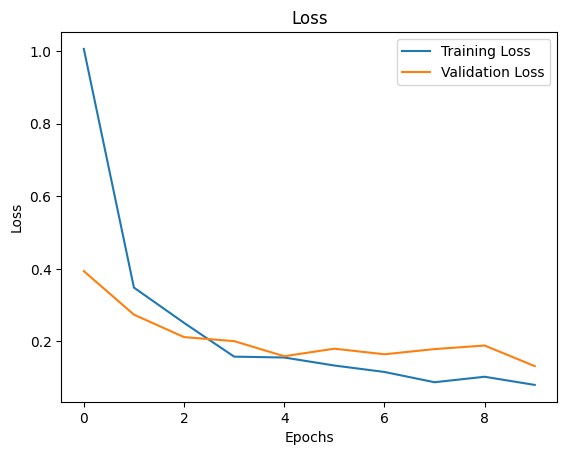

In [ ]:
plt.plot(mob_history_1.history['loss'], label='Training Loss')
plt.plot(mob_history_1.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

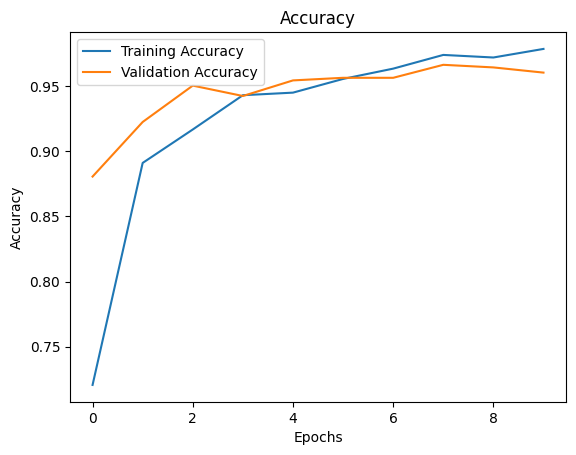

In [ ]:
plt.plot(mob_history_1.history['accuracy'], label='Training Accuracy')
plt.plot(mob_history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
mob_model_1.save("mob_mod_1.h5")

In [ ]:
train_datagen.class_indices

{'Animal': 0,
 'Bicycle': 1,
 'Bike': 2,
 'Car': 3,
 'Pedestrian': 4,
 'Pole': 5,
 'Tree': 6,
 'Truck': 7}

In [ ]:
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize to match the input size of the model
    image = np.array(image)
    image = image / 255.0  # Normalize pixel values between 0 and 1
    image = np.expand_dims(image, axis=0)  # Add an extra dimension for batch size
    return image

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [ ]:
from tensorflow.keras.applications import VGG19

In [ ]:
vgg_model = tf.keras.Sequential([VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3)),
                                 tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(512, activation='sigmoid'),
                                 tf.keras.layers.Dense(8, activation='softmax')
                                ])

vgg_model.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 batch_normalization_4 (Batc  (None, 7, 7, 512)        2048      
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 512)               12845568  
                                                                 
 dense_6 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 32,876,104
Trainable params: 32,875,080
N

In [ ]:
vgg_model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
vgg_history = vgg_model.fit(train_datagen,
                          steps_per_epoch=len(train_datagen),
                          epochs=10,
                          validation_data=test_datagen,
                          validation_steps=len(test_datagen))

Epoch 1/10
48/48 [==============================] - 88s 1s/step - loss: 2.1789 - accuracy: 0.3127 - val_loss: 3.6364 - val_accuracy: 0.1096
Epoch 2/10
48/48 [==============================] - 55s 1s/step - loss: 1.7572 - accuracy: 0.3693 - val_loss: 4.1285 - val_accuracy: 0.1096
Epoch 3/10
48/48 [==============================] - 55s 1s/step - loss: 1.7344 - accuracy: 0.3640 - val_loss: 3.2510 - val_accuracy: 0.1116
Epoch 4/10
48/48 [==============================] - 61s 1s/step - loss: 1.7376 - accuracy: 0.3660 - val_loss: 1.7260 - val_accuracy: 0.3765
Epoch 5/10
48/48 [==============================] - 55s 1s/step - loss: 1.7110 - accuracy: 0.3824 - val_loss: 1.7988 - val_accuracy: 0.3625
Epoch 6/10
48/48 [==============================] - 55s 1s/step - loss: 1.6724 - accuracy: 0.3857 - val_loss: 2.1727 - val_accuracy: 0.2131
Epoch 7/10
48/48 [==============================] - 55s 1s/step - loss: 1.6554 - accuracy: 0.3883 - val_loss: 1.9973 - val_accuracy: 0.3526
Epoch 8/10
48/48 [==

In [ ]:
vgg_model.save("vgg_19.h5")

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
Vgg16_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg16_model = tf.keras.Sequential([Vgg16_base,
                                 tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(512, activation='sigmoid'),
                                 tf.keras.layers.Dense(8, activation='softmax')
                                ])

vgg16_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization_5 (Batc  (None, 7, 7, 512)        2048      
 hNormalization)                                                 
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_7 (Dense)             (None, 512)               12845568  
                                                                 
 dense_8 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 27,566,408
Trainable params: 27,565,384
Non-trainable params: 1,024
______________________________________

In [ ]:
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
vgg16_history = vgg16_model.fit(train_datagen,
                          steps_per_epoch=len(train_datagen),
                          epochs=10,
                          validation_data=test_datagen,
                          validation_steps=len(test_datagen))

Epoch 1/10
48/48 [==============================] - 61s 1s/step - loss: 2.0628 - accuracy: 0.2615 - val_loss: 3.5637 - val_accuracy: 0.1275
Epoch 2/10
48/48 [==============================] - 54s 1s/step - loss: 1.7245 - accuracy: 0.3627 - val_loss: 2.5738 - val_accuracy: 0.1594
Epoch 3/10
48/48 [==============================] - 54s 1s/step - loss: 1.6725 - accuracy: 0.3982 - val_loss: 2.4394 - val_accuracy: 0.1873
Epoch 4/10
48/48 [==============================] - 60s 1s/step - loss: 1.5782 - accuracy: 0.4185 - val_loss: 1.5493 - val_accuracy: 0.4263
Epoch 5/10
48/48 [==============================] - 54s 1s/step - loss: 1.5275 - accuracy: 0.4376 - val_loss: 4.0721 - val_accuracy: 0.1733
Epoch 6/10
48/48 [==============================] - 54s 1s/step - loss: 1.6095 - accuracy: 0.4047 - val_loss: 5.0442 - val_accuracy: 0.1554
Epoch 7/10
48/48 [==============================] - 53s 1s/step - loss: 1.6295 - accuracy: 0.4179 - val_loss: 2.8742 - val_accuracy: 0.1474
Epoch 8/10
48/48 [==

In [ ]:
vgg16_model.save("vgg_16.h5")

In [7]:
test_image_path = 'Pedestrian.jpg'
img = cv2.imread(test_image_path)

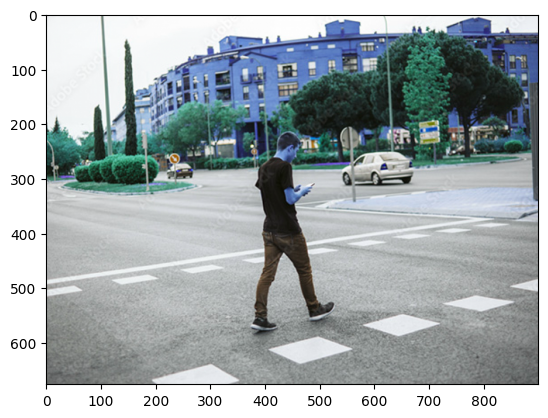

In [8]:
plt.imshow(img)

In [10]:
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize to match the input size of the model
    image = np.array(image)
    image = image / 255.0  # Normalize pixel values between 0 and 1
    image = np.expand_dims(image, axis=0)  # Add an extra dimension for batch size
    return image

In [11]:
test_image = preprocess_image(test_image_path)

In [12]:
model = tf.keras.models.load_model('cnn.h5')

In [13]:
predictions = model.predict(test_image)

1/1 [==============================] - 7s 7s/step


In [14]:
class_index = np.argmax(predictions)

In [15]:
class_index

6

In [19]:
train_datagen.class_indices

{'Animal': 0,
 'Bicycle': 1,
 'Bike': 2,
 'Car': 3,
 'Pedestrian': 4,
 'Pole': 5,
 'Tree': 6,
 'Truck': 7}

In [20]:
model = tf.keras.models.load_model('mob_mod_1.h5')

In [21]:
predictions = model.predict(test_image)

1/1 [==============================] - 3s 3s/step


In [22]:
class_index = np.argmax(predictions)

In [23]:
class_index

4

In [25]:
model = tf.keras.models.load_model('mob_model.h5')

In [26]:
predictions = model.predict(test_image)

1/1 [==============================] - 2s 2s/step


In [27]:
class_index = np.argmax(predictions)

In [28]:
class_index

5